In [7]:
import os, sys
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read dataset
data=pd.read_csv('dataset.csv')

In [3]:
# display dataset
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
# display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
# check if any duplicated row
data[data.duplicated(keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


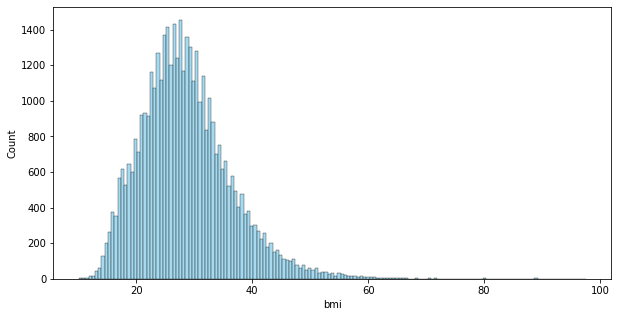

In [8]:
#check the distribution of BMI
plt.figure(figsize=(10,5))
sns.histplot(data,x='bmi',color="skyblue")
plt.savefig("BMI_distribution.png")

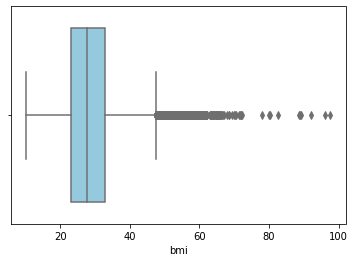

In [9]:
#check the boxplot of BMI (32.9*1.5=49.35)
sns.boxplot(x='bmi',data=data, color="skyblue")
plt.savefig("BMI_boxplot.png")

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [10]:
# copy the dataset
data_c=data.copy(deep=True)
data1=data.copy(deep=True)

In [11]:
# how many NaN in BMI
data1['bmi'].isnull().sum()

1462

In [12]:
# compute the BMI mean(without outlier) and fill missing data with mean
data1_bmi_mean = data1[data1['bmi']<=50]['bmi'].mean()
data1['bmi2'] = data1['bmi'].fillna(data1_bmi_mean)

#confirm no missing data
data1['bmi2'].isna().sum()   

0

In [13]:
# delete bmi > 50%
data2=data1.loc[data1['bmi2']<=50,]

# rename original bmi =>_bmi, bmi2 =>bmi
data2.rename(columns={'bmi': '_bmi'}, inplace=True)
data2.rename(columns={'bmi2': 'bmi'}, inplace=True)

# confirm bmi
data2.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,id,age,hypertension,heart_disease,avg_glucose_level,_bmi,stroke,bmi
count,42824.000000,42824.000000,42824.000000,42824.00000,42824.000000,41362.000000,42824.000000,42824.000000
mean,36318.167990,42.181034,0.092285,0.04759,104.195152,28.228301,0.018191,28.228301
std,21069.913764,22.608710,0.289431,0.21290,42.792945,7.095393,0.133642,6.973221
min,1.000000,0.080000,0.000000,0.00000,55.000000,10.100000,0.000000,10.100000
25%,18033.500000,24.000000,0.000000,0.00000,77.500000,23.200000,0.000000,23.300000
50%,36341.500000,44.000000,0.000000,0.00000,91.520000,27.600000,0.000000,27.900000
75%,54507.250000,60.000000,0.000000,0.00000,111.832500,32.600000,0.000000,32.400000
max,72943.000000,82.000000,1.000000,1.00000,291.050000,50.000000,1.000000,50.000000


In [14]:
# compare the smoking_status
bool_series = pd.isnull(data_c['smoking_status'])

data_c[bool_series].groupby('stroke').count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,13147,13147,13147,13147,13147,13147,13147,13147,13147,12771,0
1,145,145,145,145,145,145,145,145,145,95,0


In [15]:
# compare the smoking_status
data_stroke_1 = data_c[data_c['stroke']  == 1]
data_stroke_0 = data_c[data_c['stroke']  == 0]

Total=data['stroke'].count()
Total_stroke= data_stroke_1['stroke'].count() 
Total_Nostroke= data_stroke_0['stroke'].count() 

smoking_status_nonNull=data['smoking_status'].count()
stroke_1_nonNull=data_stroke_1['smoking_status'].count()
stroke_0_nonNull=data_stroke_0['smoking_status'].count()

print("Smoking Status with Null value:" , Total-smoking_status_nonNull)
print("stroke with Null value:" , Total_stroke-stroke_1_nonNull)

print("Total stroke:" , Total_stroke)
print("(stroke with Null value)/Total strok {:2.2f} %".format((Total_stroke-stroke_1_nonNull)/Total_stroke*100))


Smoking Status with Null value: 13292
stroke with Null value: 145
Total stroke: 783
(stroke with Null value)/Total strok 18.52 %


In [16]:
# change smoking_status with the NaN value to "unknown" 
data2['smoking_status']= data2['smoking_status'].fillna('unknown')
data2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,_bmi,smoking_status,stroke,bmi
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0,18.0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,39.2
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0,17.6
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,35.9
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,52380,Male,47.0,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0,25.2
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,20.4
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,28.9
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,33.2


In [17]:
# confirm smoking_status
data2['smoking_status'].value_counts()

never smoked       15825
unknown            13165
formerly smoked     7368
smokes              6466
Name: smoking_status, dtype: int64

In [18]:
## delete age <18
data3=data2.loc[data['age']>=18,]
data3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,_bmi,smoking_status,stroke,bmi
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,39.2
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,35.9
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,17.7
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,27.0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43393,69344,Male,39.0,0,0,Yes,Private,Rural,132.22,31.6,never smoked,0,31.6
43394,52380,Male,47.0,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0,25.2
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,28.9
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,33.2


In [19]:
# change the age into int
data3['age']=data3['age'].astype(dtype=np.int64)
data3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,_bmi,smoking_status,stroke,bmi
1,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,39.2
3,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,35.9
6,52800,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,17.7
7,41413,Female,75,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,27.0
8,15266,Female,32,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43393,69344,Male,39,0,0,Yes,Private,Rural,132.22,31.6,never smoked,0,31.6
43394,52380,Male,47,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0,25.2
43397,28375,Female,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,28.9
43398,27973,Male,40,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,33.2


In [20]:
# confirm the type of age change to int64
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35300 entries, 1 to 43399
Data columns (total 13 columns):
id                   35300 non-null int64
gender               35300 non-null object
age                  35300 non-null int64
hypertension         35300 non-null int64
heart_disease        35300 non-null int64
ever_married         35300 non-null object
work_type            35300 non-null object
Residence_type       35300 non-null object
avg_glucose_level    35300 non-null float64
_bmi                 33950 non-null float64
smoking_status       35300 non-null object
stroke               35300 non-null int64
bmi                  35300 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 3.8+ MB


In [21]:
#creating a copy of original dataset for futher process
data3_copy=data3.copy(deep=True)


# transform the str columns to index:
le = LabelEncoder()
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data3_copy[cat_cols] = data3_copy[cat_cols].apply(le.fit_transform)
data3_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,_bmi,smoking_status,stroke,bmi
1,30468,1,58,1,0,1,2,1,87.96,39.2,1,0,39.2
3,56543,0,70,0,0,1,2,0,69.04,35.9,0,0,35.9
6,52800,0,52,0,0,1,2,1,77.59,17.7,0,0,17.7
7,41413,0,75,0,1,1,3,0,243.53,27.0,1,0,27.0
8,15266,0,32,0,0,1,2,0,77.67,32.3,2,0,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43393,69344,1,39,0,0,1,2,0,132.22,31.6,1,0,31.6
43394,52380,1,47,0,0,0,0,1,68.52,25.2,0,0,25.2
43397,28375,0,82,1,0,1,2,1,91.94,28.9,0,0,28.9
43398,27973,1,40,0,0,1,2,1,99.16,33.2,1,0,33.2


<b>Remark</b>

<span style='color:blue '> gender: {'Male': 1, 'Female': 0} </span>

<span style='color:blue '> ever_married:{'Yes':1,'No':0} </span>

<span style='color:blue '> work_type:{'Govt_job':0,'Never_worked':1,'Private': 2, 'Self-employed': 3} </span>

<span style='color:blue '> Residence_type:{'Rural': 0, 'Urban': 1} </span>

<span style='color:blue '> smoking_status:{'formerly smoked':0,'never smoked': 1, 'smokes':2, 'unknown':3} </span>


In [22]:
#data3_copy.columns
data3_copy = data3_copy[['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level',
       'smoking_status', 'bmi','stroke',  '_bmi']]

In [24]:
#expore the precessed file
data3_copy.to_csv("processed data.csv",index=False)